In [3]:
class SM:
    start_state = None

    def transition_fn(self,s,x):
        # define transition function here
        raise NotImplementedError
    
    def output_fn(self,s):
        # define output function here
        raise NotImplementedError
    
    def transduce(self,input_seq):
        state = self.start_state
        output_seq = []

        for x in input_seq:
            state = self.transition_fn(state,x)
            output= self.output_fn(state)
            output_seq.append(output)
        return output_seq
    



In [4]:
class Accumulator(SM):
    start_state = 0

    def transition_fn(self, s, x):
        return(s+x)
    
    def output_fn(self, s):
        return s 


In [5]:
sm = Accumulator()

input = [2,4,-5,9,8,-11,6]
sm.transduce(input)

[2, 6, 1, 10, 18, 7, 13]

In [6]:
# Binary addition

class Binary_Addition(SM):
    start_state = (0,0) 

    def transition_fn(self, s, x):
        sum = s[0]
        carry = s[1]

        a , b = x
        sum = a + b + carry
        carry = sum // 2 
        return(sum,carry) 
        
    def output_fn(self, s):
        sum,_ = s
        return sum%2

In [7]:
sm = Binary_Addition()

input_seq = [(1,1),(0,1),(0,0)]

sm.transduce(input_seq)

[0, 0, 1]

In [8]:
#Reverser   

class Reverser(SM):
    start_state = ([],False) # Change

    def transition_fn(self, s, x):
        # Your code here
        buffer , seen_end  = s
        if not seen_end:
            if x == 'end':
                return (buffer , True)
            else:
                return (buffer + [x], False)

        else:
            if buffer:
                return(buffer[:-1], True)
            return([],True)
    
    def output_fn(self, s):
        buffer, seen_end = s
        if not seen_end:
            return None  
        if buffer:
            return buffer[-1]
        return None



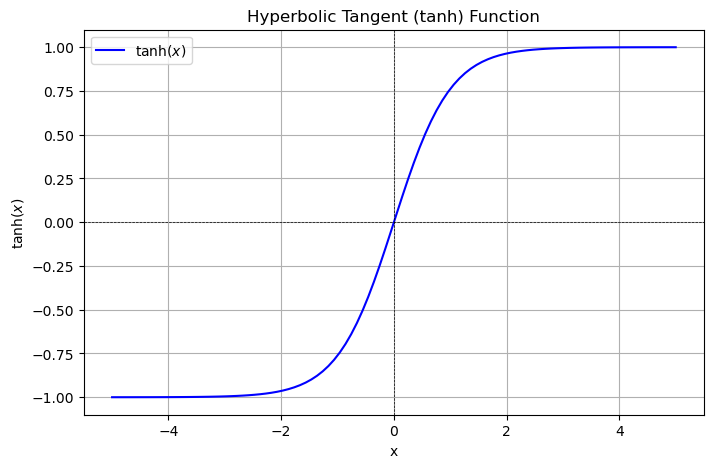

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from -5 to 5
x = np.linspace(-5, 5, 100)
y = np.tanh(x)  # Compute tanh(x)

# Plot tanh function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$\tanh(x)$", color='blue')
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")

# Labels and title
plt.xlabel("x")
plt.ylabel(r"$\tanh(x)$")
plt.title("Hyperbolic Tangent (tanh) Function")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [10]:
r = np.array([0,1,0,2])
c = np.array([[0,0.09,0.81,0],
              [0.81,0.09,0,0],
              [0,0,0.09,0.81],
              [0.81,0,0,0.09]])

I = np.identity(4)

A = I - c
v = np.linalg.solve(A,r)
v

array([6.05288295, 6.48663207, 6.7519581 , 7.58553317])

In [11]:
# Given values for iteration 1 (start with all Q-values as 0)
gamma = 0.9

# Reward function
r = [0, 1, 0, 2]

# Transition probabilities for action 'b' and 'c'
T_b = [
    [0.0, 0.09, 0.81, 0.0],
    [0.81, 0.09, 0.0, 0.0],
    [0.81, 0.0, 0.09, 0.0],
    [0.0, 0.0, 0.81, 0.09]
]
T_c = [
    [0.0, 0.1, 0.9, 0.0],
    [0.9, 0.1, 0.0, 0.0],
    [0.9, 0.0, 0.1, 0.0],
    [0.0, 0.0, 0.9, 0.1]
]

# Initialize Q-values to 0
Q = [[0, 0] for _ in range(4)]  # Q(s, a) for s = 0..3 and a = b, c

# Perform the update for Q-values based on Bellman equation
Q_0_b = r[0] + gamma * (T_b[0][0] * max(Q[0]) + T_b[0][1] * max(Q[1]) + T_b[0][2] * max(Q[2]) + T_b[0][3] * max(Q[3]))
Q_0_c = r[0] + gamma * (T_c[0][0] * max(Q[0]) + T_c[0][1] * max(Q[1]) + T_c[0][2] * max(Q[2]) + T_c[0][3] * max(Q[3]))

Q_1_b = r[1] + gamma * (T_b[1][0] * max(Q[0]) + T_b[1][1] * max(Q[1]) + T_b[1][2] * max(Q[2]) + T_b[1][3] * max(Q[3]))
Q_1_c = r[1] + gamma * (T_c[1][0] * max(Q[0]) + T_c[1][1] * max(Q[1]) + T_c[1][2] * max(Q[2]) + T_c[1][3] * max(Q[3]))

Q_2_b = r[2] + gamma * (T_b[2][0] * max(Q[0]) + T_b[2][1] * max(Q[1]) + T_b[2][2] * max(Q[2]) + T_b[2][3] * max(Q[3]))
Q_2_c = r[2] + gamma * (T_c[2][0] * max(Q[0]) + T_c[2][1] * max(Q[1]) + T_c[2][2] * max(Q[2]) + T_c[2][3] * max(Q[3]))

Q_3_b = r[3] + gamma * (T_b[3][0] * max(Q[0]) + T_b[3][1] * max(Q[1]) + T_b[3][2] * max(Q[2]) + T_b[3][3] * max(Q[3]))
Q_3_c = r[3] + gamma * (T_c[3][0] * max(Q[0]) + T_c[3][1] * max(Q[1]) + T_c[3][2] * max(Q[2]) + T_c[3][3] * max(Q[3]))

# Round values to 3 decimal places
iteration_1 = [round(Q_0_b, 3), round(Q_0_c, 3), round(Q_1_b, 3), round(Q_1_c, 3), round(Q_2_b, 3), round(Q_2_c, 3), round(Q_3_b, 3), round(Q_3_c, 3)]

print(iteration_1)


[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 2.0]


In [12]:
Q = [[0, 0] for _ in range(4)]
Q

[[0, 0], [0, 0], [0, 0], [0, 0]]

In [16]:
import numpy as np

# Discount factor
gamma = 0.9

# Reward function
r = [0, 1, 0, 2]

# Transition probabilities for actions 'b' and 'c'
T_b = [
    [0.0, 0.9, 0.1, 0.0],
    [0.9, 0.1, 0.0, 0.0],
    [0.0, 0.0, 0.1, 0.9],
    [0.9, 0.0, 0.0, 0.1]
]
T_c = [
    [0.0, 0.1, 0.9, 0.0],
    [0.9, 0.1, 0.0, 0.0],
    [0.0, 0.0, 0.1, 0.9],
    [0.9, 0.0, 0.0, 0.1]
]

# Iteration 1 Q-values
Q = [[0, 0], [1, 1], [0, 0], [2, 2]]  # Q(s, a) for s = 0..3 and a = {b, c}

# Compute Iteration 2 Q-values using Bellman equation
Q_0_b = r[0] + gamma * (T_b[0][0] * max(Q[0]) + T_b[0][1] * max(Q[1]) + T_b[0][2] * max(Q[2]) + T_b[0][3] * max(Q[3]))
Q_0_c = r[0] + gamma * (T_c[0][0] * max(Q[0]) + T_c[0][1] * max(Q[1]) + T_c[0][2] * max(Q[2]) + T_c[0][3] * max(Q[3]))

Q_1_b = r[1] + gamma * (T_b[1][0] * max(Q[0]) + T_b[1][1] * max(Q[1]) + T_b[1][2] * max(Q[2]) + T_b[1][3] * max(Q[3]))
Q_1_c = r[1] + gamma * (T_c[1][0] * max(Q[0]) + T_c[1][1] * max(Q[1]) + T_c[1][2] * max(Q[2]) + T_c[1][3] * max(Q[3]))

Q_2_b = r[2] + gamma * (T_b[2][0] * max(Q[0]) + T_b[2][1] * max(Q[1]) + T_b[2][2] * max(Q[2]) + T_b[2][3] * max(Q[3]))
Q_2_c = r[2] + gamma * (T_c[2][0] * max(Q[0]) + T_c[2][1] * max(Q[1]) + T_c[2][2] * max(Q[2]) + T_c[2][3] * max(Q[3]))

Q_3_b = r[3] + gamma * (T_b[3][0] * max(Q[0]) + T_b[3][1] * max(Q[1]) + T_b[3][2] * max(Q[2]) + T_b[3][3] * max(Q[3]))
Q_3_c = r[3] + gamma * (T_c[3][0] * max(Q[0]) + T_c[3][1] * max(Q[1]) + T_c[3][2] * max(Q[2]) + T_c[3][3] * max(Q[3]))

# Round to 3 decimal places
iteration_2 = [
    round(Q_0_b, 3), round(Q_0_c, 3), 
    round(Q_1_b, 3), round(Q_1_c, 3), 
    round(Q_2_b, 3), round(Q_2_c, 3), 
    round(Q_3_b, 3), round(Q_3_c, 3)
]

print("Iteration 2 Q-values:", iteration_2)


Iteration 2 Q-values: [0.81, 0.09, 1.09, 1.09, 1.62, 1.62, 2.18, 2.18]


In [17]:
Q = [[0.81, 0.09], [1.09, 1.09], [1.62, 1.62], [2.18, 2.18]]

Q_0_b = r[0] + gamma * (T_b[0][0] * max(Q[0]) + T_b[0][1] * max(Q[1]) + T_b[0][2] * max(Q[2]) + T_b[0][3] * max(Q[3]))
Q_0_c = r[0] + gamma * (T_c[0][0] * max(Q[0]) + T_c[0][1] * max(Q[1]) + T_c[0][2] * max(Q[2]) + T_c[0][3] * max(Q[3]))

Q_1_b = r[1] + gamma * (T_b[1][0] * max(Q[0]) + T_b[1][1] * max(Q[1]) + T_b[1][2] * max(Q[2]) + T_b[1][3] * max(Q[3]))
Q_1_c = r[1] + gamma * (T_c[1][0] * max(Q[0]) + T_c[1][1] * max(Q[1]) + T_c[1][2] * max(Q[2]) + T_c[1][3] * max(Q[3]))

Q_2_b = r[2] + gamma * (T_b[2][0] * max(Q[0]) + T_b[2][1] * max(Q[1]) + T_b[2][2] * max(Q[2]) + T_b[2][3] * max(Q[3]))
Q_2_c = r[2] + gamma * (T_c[2][0] * max(Q[0]) + T_c[2][1] * max(Q[1]) + T_c[2][2] * max(Q[2]) + T_c[2][3] * max(Q[3]))

Q_3_b = r[3] + gamma * (T_b[3][0] * max(Q[0]) + T_b[3][1] * max(Q[1]) + T_b[3][2] * max(Q[2]) + T_b[3][3] * max(Q[3]))
Q_3_c = r[3] + gamma * (T_c[3][0] * max(Q[0]) + T_c[3][1] * max(Q[1]) + T_c[3][2] * max(Q[2]) + T_c[3][3] * max(Q[3]))

# Round to 3 decimal places
iteration_2 = [
    round(Q_0_b, 3), round(Q_0_c, 3), 
    round(Q_1_b, 3), round(Q_1_c, 3), 
    round(Q_2_b, 3), round(Q_2_c, 3), 
    round(Q_3_b, 3), round(Q_3_c, 3)
]


In [18]:
iteration_2

[1.029, 1.41, 1.754, 1.754, 1.912, 1.912, 2.852, 2.852]

In [29]:
r = 0.99999
n = 9

(1 - r**n )/(1-r)

8.999640008396804

MDP